# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%time
import os
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs


In [2]:
%time

_features = './features.txt'
_subject_train = './subject_train.txt'
_X_train = './X_train.txt'
_subject_test = './subject_test.txt'
_X_test = './X_test.txt'
_y_train = './y_train.txt'
_y_test = './y_test.txt'

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


In [3]:
%time

features = (pd.read_csv(filepath_or_buffer=_features,
                        sep='?',
                        header=None)
              .squeeze('columns'))

subject_train = (pd.read_csv(filepath_or_buffer=_subject_train,
                             header=None)
                   .squeeze('columns'))

subject_test = (pd.read_csv(filepath_or_buffer=_subject_test,
                            header=None)
                   .squeeze('columns'))

X_train = (pd.read_csv(filepath_or_buffer=_X_train,
                       header=None,
                       names=features,
                       delim_whitespace=True)
             .assign(subject_train=subject_train))

y_train = (pd.read_csv(filepath_or_buffer=_y_train,
                      header=None)
             .squeeze('columns'))

X_test = (pd.read_csv(filepath_or_buffer=_X_test,
                      header=None,
                      names=features,
                      delim_whitespace=True)
             .assign(subject_test=subject_test))

y_test = (pd.read_csv(filepath_or_buffer=_y_test,
                      header=None)
            .squeeze('columns'))

X_train['individuo'] = subject_train
X_test['individuo'] = subject_test
X_train.set_index([X_train.index, 'individuo'], drop=True)

#X_test = X_test.set_index([X_test.index, 'individuo'], drop=True)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


<ipython-input-3-06927705790c>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = (pd.read_csv(filepath_or_buffer=_X_train,
<ipython-input-3-06927705790c>:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = (pd.read_csv(filepath_or_buffer=_X_test,


,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",subject_train
,individuo,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30


In [4]:
y_train

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=42)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [6]:
clf = DecisionTreeClassifier(random_state=42, max_depth=4).fit(X_train, y_train)

In [7]:
best_variavel = pd.DataFrame({'Variavel': clf.feature_importances_},
                             index=X_train.columns).sort_values(by='Variavel', ascending=False)
best_variavel.head(3)

,Variavel
53 tGravityAcc-min()-X,0.285303
"382 fBodyAccJerk-bandsEnergy()-1,8",0.254091
42 tGravityAcc-mean()-Y,0.164608


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

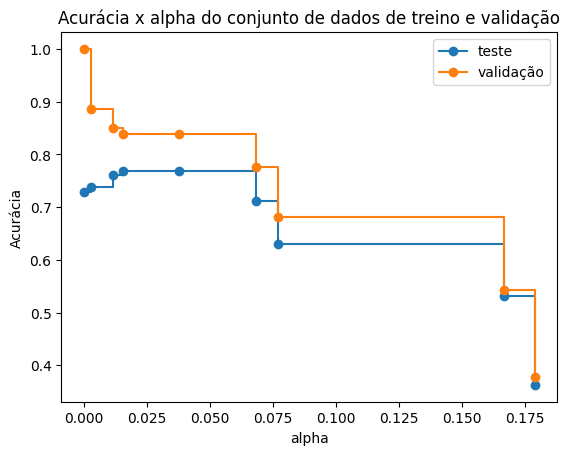

CPU times: user 344 ms, sys: 109 ms, total: 454 ms
Wall time: 339 ms


In [8]:
%%time

top_test = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','42 tGravityAcc-mean()-Y']]
top_valid = X_valid[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','42 tGravityAcc-mean()-Y']]

path = clf.cost_complexity_pruning_path(top_test, y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(top_valid, y_valid)
    clfs.append(clf)


train_scores = [clf.score(top_test, y_test) for clf in clfs]
valid_scores = [clf.score(top_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [9]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 100.00


DecisionTreeClassifier(random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [10]:
top_test = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','42 tGravityAcc-mean()-Y']]

acuracia_teste = melhor_arvore.score(top_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')

Acurácia: 72.85


In [11]:
from sklearn.metrics import confusion_matrix
y_pred = melhor_arvore.predict(top_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[342, 108,  46,   0,   0,   0],
       [158, 272,  41,   0,   0,   0],
       [ 94,  81, 245,   0,   0,   0],
       [  0,   0,   0, 363, 128,   0],
       [  1,   0,   0, 143, 388,   0],
       [  0,   0,   0,   0,   0, 537]])

Acurácia: 72.85


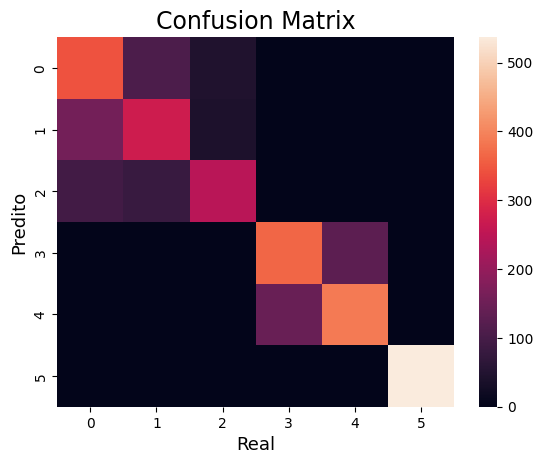

In [12]:
sns.heatmap(cm)
plt.ylabel('Predito',fontsize=13)
plt.xlabel('Real',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
acuracia_teste = melhor_arvore.score(top_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plt.show()